# Project ADA
### Import all the necessary libraries

In [3]:
import pandas as pd
import plotly.express as px

### Load all the data

In [4]:
# Define the folder
FOLDER = 'data/processed/'

# Load the data
df_beers = pd.read_parquet(FOLDER + 'beers.pq')
df_breweries = pd.read_parquet(FOLDER + 'breweries.pq')
df_users = pd.read_parquet(FOLDER + 'users.pq')
df_ratings_no_text = pd.read_parquet(FOLDER + 'ratings_no_text.pq')

In [5]:
# Select only the countries where the number of ratings are above a certain threshold
MIN_RATINGS_THRESHOLD = 1000
number_of_ratings_per_country = df_ratings_no_text['location'].value_counts()
popular_countries = number_of_ratings_per_country[number_of_ratings_per_country > MIN_RATINGS_THRESHOLD].index

# Filter all the data
df_ratings_no_text = df_ratings_no_text[df_ratings_no_text['location'].isin(popular_countries)]
df_beers = df_beers[df_beers['beer_id'].isin(df_ratings_no_text['beer_id'].unique())]
df_breweries = df_breweries[df_breweries['id'].isin(df_ratings_no_text['brewery_id'].unique())]

df_ratings_no_text.head(5)

,user_id,rating,review,abv,brewery_name,beer_id,appearance,palate,aroma,overall,taste,style,beer_name,brewery_id,date,idx,location
1,stjamesgate.163714,3.67,True,4.5,Strangford Lough Brewing Company Ltd,19590,3.0,3.5,3.5,3.5,4.0,English Pale Ale,Barelegs Brew,10093,2009-02-20 12:00:00,1,United Kingdom
2,mdagnew.19527,3.73,True,4.5,Strangford Lough Brewing Company Ltd,19590,4.0,3.5,3.5,3.5,4.0,English Pale Ale,Barelegs Brew,10093,2006-03-13 12:00:00,2,United Kingdom
3,helloloser12345.10867,3.98,True,4.5,Strangford Lough Brewing Company Ltd,19590,4.0,4.0,3.5,4.5,4.0,English Pale Ale,Barelegs Brew,10093,2004-12-01 12:00:00,3,United Kingdom
4,cypressbob.3708,4.00,True,4.5,Strangford Lough Brewing Company Ltd,19590,4.0,4.0,4.0,4.0,4.0,English Pale Ale,Barelegs Brew,10093,2004-08-30 12:00:00,4,United Kingdom
5,hellpop65.48993,3.25,False,4.8,Strangford Lough Brewing Company Ltd,19827,NaN,NaN,NaN,NaN,NaN,English Pale Ale,Legbiter,10093,2014-12-01 12:00:00,5,United Kingdom


In [6]:
df_beers.head(5)

,beer_id,beer_name,brewery_id,brewery_name,style,abv,avg,std,median,appearance,aroma,palate,overall,nbr_ratings,nbr_reviews,nbr_interactions
24,19590,Barelegs Brew,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4.5,3.84,0.17,3.86,3.75,3.62,3.75,3.88,0,4,4
25,19827,Legbiter,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,4.8,3.43,0.47,3.50,3.84,3.47,3.51,3.50,14,58,72
26,20841,St. Patrick's Ale,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,6.0,3.89,0.47,3.98,3.75,3.79,3.83,3.92,2,6,8
27,20842,St. Patrick's Best,10093,Strangford Lough Brewing Company Ltd,English Bitter,4.2,3.56,0.44,3.63,3.71,3.51,3.44,3.71,14,47,61
28,22659,St. Patrick's Gold,10093,Strangford Lough Brewing Company Ltd,American Pale Wheat Ale,4.8,3.96,0.00,3.96,3.00,4.50,4.00,4.50,0,1,1


In [7]:
df_breweries.head(5)

,id,location,name,nbr_beers
9,10093,United Kingdom,Strangford Lough Brewing Company Ltd,5
10,32848,United Kingdom,The Sheelin Brewery,1
11,297,United Kingdom,Thomas Caffrey Brewing Co.,2
12,40360,United Kingdom,Walled City Brewing Company,5
13,3415,United Kingdom,Whitewater Brewing Co,20


### Show some meaningful data
##### Correlation analysis

In [8]:
# Plot scatter plot
def plot_scatter_plot(df, title, xlabel, ylabel, regression_line=False):
    # Set some general settings
    px.defaults.width = 800
    px.defaults.height = 600
    px.defaults.template = "plotly_white"

    # Set the figure
    fig = px.scatter(df, x='x', y='y', title=title, text='label', labels={'x': xlabel, 'y': ylabel}, hover_data={'label': True})
    fig.update_traces(textposition='top center')
    if regression_line:
        fig.update_traces(marker=dict(size=4, opacity=0.5), selector=dict(mode='markers'))
        fig.update_traces(line=dict(width=2, color='DarkSlateGrey'), selector=dict(mode='lines'))
        fig.add_traces(px.scatter(df, x=df.x, y=df.y, trendline='ols').data)
        corr = df['x'].corr(df['y'])
        fig.add_annotation(x=0.5, y=0.9, xref='paper', yref='paper', text=f'Correlation coefficient: {corr:.2f}', showarrow=False)
    fig.show()

In [9]:
LABEL_1 = 'palate'
LABEL_2 = 'abv'

# Get the average rating per country
avg_rating_country = df_ratings_no_text.groupby('location').agg({LABEL_1: 'mean'})

# Get the average ABV per country
avg_abv_country = df_ratings_no_text.groupby('location').agg({LABEL_2: 'mean'})

# Create an aggregated dataframe to then plot
aggregated_df = pd.DataFrame({
    'x': avg_rating_country[LABEL_1].values,
    'y': avg_abv_country[LABEL_2].values,
    'label': avg_rating_country.index
})

# Plot the scatter plot
plot_scatter_plot(aggregated_df, 'Average Rating vs ABV per country', 'Average Rating', 'Average ABV', True)

In [10]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Create an image with a slider
fig = go.Figure()

# Iterate for each year
unique_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for i, y in enumerate(unique_years):
    # Filter the data for a specific year
    df_corr_year = df_ratings_no_text[df_ratings_no_text['date'].dt.year == y]

    # compute the metrics
    avg_rating_country = df_corr_year.groupby('location').agg({'palate': 'mean'})
    avg_abv_country = df_corr_year.groupby('location').agg({'abv': 'mean'})
    aggregated_df = pd.DataFrame({
        'x': avg_rating_country['palate'].values,
        'y': avg_abv_country['abv'].values,
        'label': avg_rating_country.index
    })

    # Do the plotting part
    fig.add_trace(go.Scatter(
        x=aggregated_df['x'],
        y=aggregated_df['y'],
        mode='markers+text',
        text=aggregated_df['label'],
        textposition='top center',
        visible=(i == 0)
    ))
    # Generate regression trace using px.scatter
    regression_fig = px.scatter(aggregated_df, x='x', y='y', trendline='ols')
    regression_fig.update_traces(marker=dict(size=4, opacity=0.5), selector=dict(mode='markers'))
    regression_fig.update_traces(line=dict(width=2, color='DarkSlateGrey'), selector=dict(mode='lines'))

    # Extract the regression trace
    regression_trace = regression_fig.data[1]
    regression_trace.visible = (i == 0)  # Set visibility based on current year or step

    # Add the regression trace to your existing figure
    fig.add_trace(regression_trace)

# Prepare the slider 
steps = []
for i, y in enumerate(unique_years):
    step = dict(
        label=str(y),
        method='update',
        args=[{'visible': [False] * len(fig.data)}]
    )
    step['args'][0]['visible'][i * 2] = True  # Show the scatter plot
    step['args'][0]['visible'][i * 2 + 1] = True  # Show the regression line
    steps.append(step)

# Set some figure stuff
fig.update_layout(
    sliders=[
        dict(
            active=0,
            steps=steps
        )
    ],
    xaxis_title='Average Rating',
    yaxis_title='Average ABV',
    title='Average Rating vs ABV per country over the years'
)


# Set the figure such that it's a square
fig.update_layout(
    width=1200,
    height=800
)


fig.show()

Very nice correlation between the average rating and the average ABV. It seems that higher the average ABV the higher the average rating and in general we see that all the rating increases almost linearly with the average ABV (very interesting result in my opinion since it's not something obvious).

### Evolution of values over time

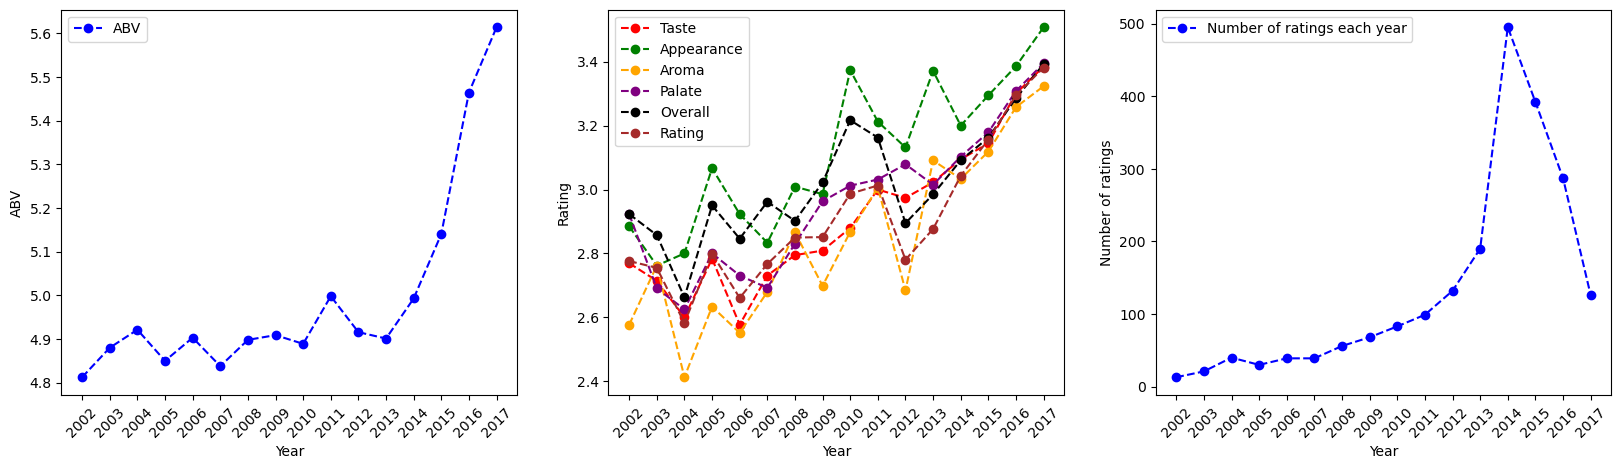

In [73]:
# Plot the value for each year only for the specific location
from matplotlib import pyplot as plt

# Filter location
location = 'Greece'
df_filtered = df_ratings_no_text[df_ratings_no_text['location'] == location]
#df_filtered = df_ratings_no_text

# Filter the data for a specific location
abv_mean = df_filtered.groupby(df_filtered['date'].dt.year)['abv'].mean()
rating_mean = df_filtered.groupby(df_filtered['date'].dt.year)['taste'].mean()
rating_mean_2 = df_filtered.groupby(df_filtered['date'].dt.year)['appearance'].mean()
rating_mean_3 = df_filtered.groupby(df_filtered['date'].dt.year)['aroma'].mean()
rating_mean_4 = df_filtered.groupby(df_filtered['date'].dt.year)['palate'].mean()
rating_mean_5 = df_filtered.groupby(df_filtered['date'].dt.year)['overall'].mean()
rating_mean_6 = df_filtered.groupby(df_filtered['date'].dt.year)['rating'].mean()

number_of_ratings_country = df_filtered.groupby(df_filtered['date'].dt.year)['rating'].count()

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(abv_mean, label='ABV', color='blue', linestyle='dashed', marker='o')
plt.ylabel('ABV')
plt.xlabel('Year')
plt.xticks(df_filtered['date'].dt.year.unique(), rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(rating_mean, label='Taste', color='red', linestyle='dashed', marker='o')
plt.plot(rating_mean_2, label='Appearance', color='green', linestyle='dashed', marker='o')
plt.plot(rating_mean_3, label='Aroma', color='orange', linestyle='dashed', marker='o')
plt.plot(rating_mean_4, label='Palate', color='purple', linestyle='dashed', marker='o')
plt.plot(rating_mean_5, label='Overall', color='black', linestyle='dashed', marker='o')
plt.plot(rating_mean_6, label='Rating', color='brown', linestyle='dashed', marker='o')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(df_filtered['date'].dt.year.unique(), rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(number_of_ratings_country, label='Number of ratings each year', color='blue', linestyle='dashed', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.xticks(df_filtered['date'].dt.year.unique(), rotation=45)
plt.legend()

plt.show()


Overall there is an increase in the average ABV and the different ratings (taste, appearance, aroma, palate, overall) over time. If we filter by the country we see that the US has a strong impact so since most of the reviews are from that country it might bring everything up. <br>
Let's now consider the average of the averages (to reduce the impact of the fact that some countries has a significant highly number of reviews) and see if the trend is still the same.

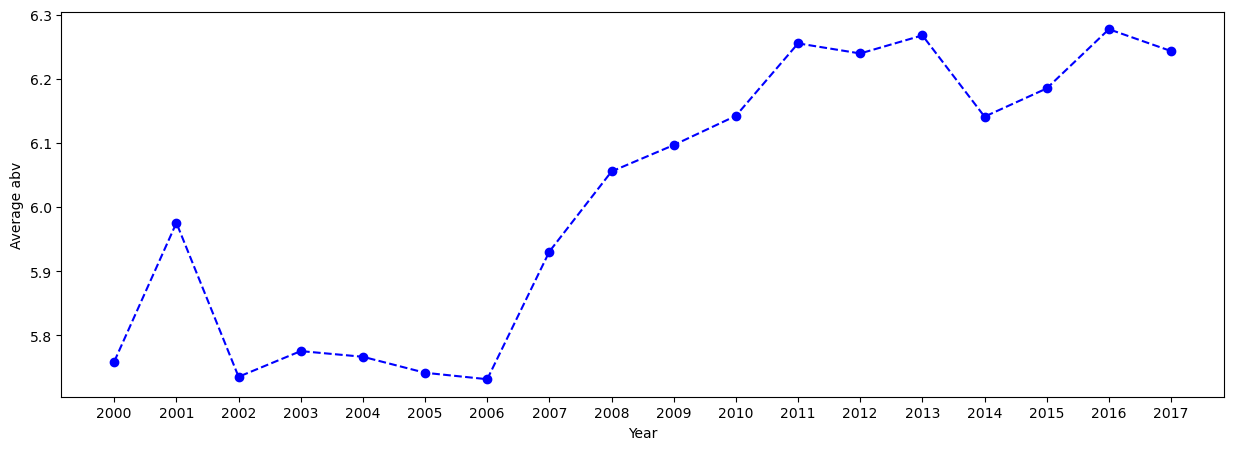

In [57]:
LABEL = 'abv'
fig = plt.figure(figsize=(15, 5))
values = []
for i, y in enumerate(unique_years):
    df_averages = df_ratings_no_text[df_ratings_no_text['date'].dt.year == y].groupby('location').agg({LABEL: 'mean'})
    avg_value = df_averages.mean()
    values.append(avg_value[LABEL])
plt.plot(unique_years, values, label='ABV', color='blue', linestyle='dashed', marker='o')
plt.xticks(unique_years)
plt.xlabel('Year')
plt.ylabel(f'Average {LABEL}')
plt.show()

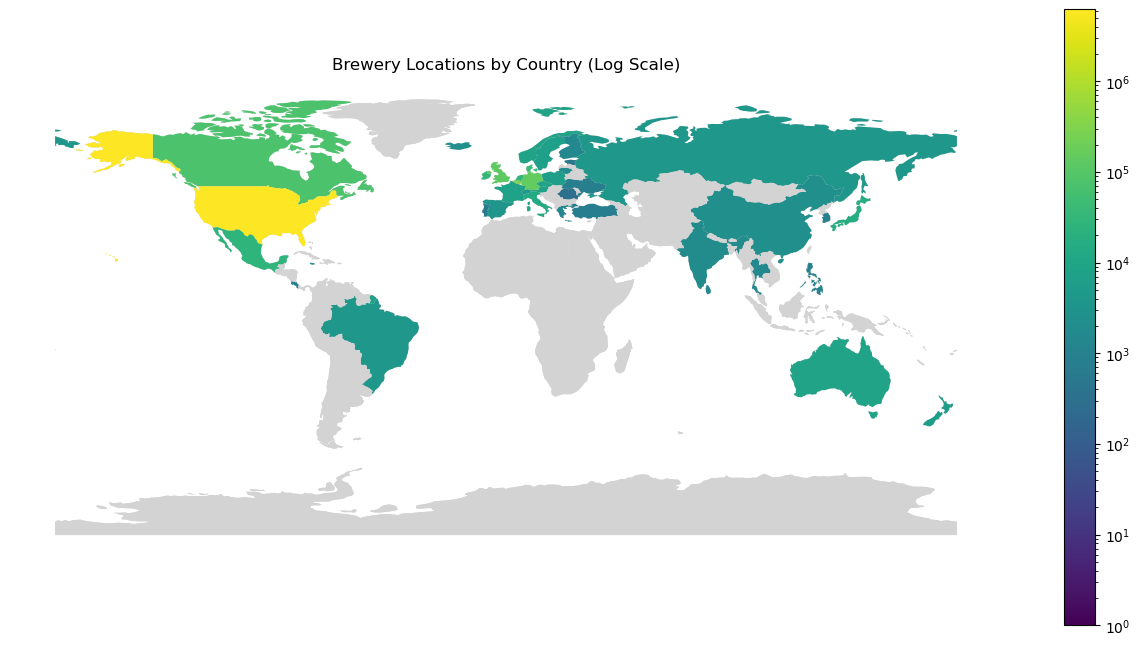

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

location = 'United States of America'

merged = df_ratings_no_text.merge(df_users[['user_id','location']], left_on='user_id', right_on='user_id')
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip").rename(columns={'ADMIN': 'name'})
merged = merged[merged['location_y'] == location].groupby('location_x').size().reset_index(name='count')
merged = world.merge(merged, left_on='name', right_on='location_x', how='left')

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))
world.plot(ax=ax, color='lightgray')  

# Plot with log scale normalization
merged.plot(
    column='count',
    ax=ax,
    legend=True,
    cmap='viridis',  
    norm=mcolors.LogNorm(vmin=1, vmax=merged['count'].max()), 
    missing_kwds={"color": "lightgray"}
)
ax.set_title('Brewery Locations by Country (Log Scale)')
plt.axis('off')
plt.show()